# Introduction

In this notebook I was exploring and analyzing data from the Millennium Development Goals(MDG).A set of 8 Goals for 2015were defined by the United Nations to help improve living conditions and the condition of our planet.Key indicators were defined for each of the goals .In this project I had to work with Goal 7 which is to ensure environmental sustainability of carbon dioxide(CO2)emissions protected land and sea areas,and forests.I had to find the measure of central tendency,describe distributions and interpret it's histogram and know what outliers are and know how they affect measures of central tendency. 

### Importing needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.stats import pearsonr
%matplotlib inline

from itertools import chain

# Examining dataframe

In [2]:
stats = pd.read_csv("MDG_Export_20191227 (1).csv")
stats.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,...,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,...,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,...,,,,,,,,,,


In [3]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CountryCode   690 non-null    int64 
 1   Country       690 non-null    object
 2   SeriesCode    690 non-null    int64 
 3   MDG           690 non-null    object
 4   Series        690 non-null    object
 5   1990          689 non-null    object
 6   Footnotes     67 non-null     object
 7   Type          690 non-null    object
 8   1991          690 non-null    object
 9   Footnotes.1   508 non-null    object
 10  Type.1        690 non-null    object
 11  1992          690 non-null    object
 12  Footnotes.2   486 non-null    object
 13  Type.2        690 non-null    object
 14  1993          690 non-null    object
 15  Footnotes.3   486 non-null    object
 16  Type.3        690 non-null    object
 17  1994          690 non-null    object
 18  Footnotes.4   485 non-null    object
 19  Type.4  

# Checking Statistical summary

In [4]:
stats.describe()

,CountryCode,SeriesCode
count,690.000000,690.000000
mean,439.465217,644.000000
std,254.138802,76.949647
min,4.000000,567.000000
25%,222.000000,567.000000
50%,439.000000,616.000000
75%,660.000000,749.000000
max,894.000000,749.000000


In [5]:
#Checking data types

stats.dtypes.value_counts()

object    93
int64      2
dtype: int64

# Cleaning And Preparing Data

In [6]:
# Removing columns that I don't need

for row in stats:
    if "Footnotes" in row:
        del stats[row]
    elif "Type." in row:
        del stats[row]
        
stats.head()        

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,1992,1993,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,E,,,,...,2.1,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,G,2493.6,1426.5,1375.1,...,8470.8,12251.4,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,C,,,,...,,,,,0.46,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,C,,,,...,28.3,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,G,3971.4,2387.2,2343.2,...,4415.1,4668.1,,,,,,,,


In [7]:
#Replacing all empty string and records with on'ly spaces nan
replacing_re = stats.replace(r'^\s*$', np.nan,regex = True)

# Checking duplicates

In [8]:
#Checking nunique values
stats.nunique()

CountryCode    230
Country        230
SeriesCode       3
MDG              1
Series           3
1990           516
Type             4
1991           175
1992           199
1993           195
1994           194
1995           194
1996           199
1997           198
1998           204
1999           200
2000           569
2001           200
2002           205
2003           207
2004           208
2005           391
2006           208
2007           206
2008           206
2009           211
2010           387
2011           208
2012             1
2013             1
2014           202
2015             1
2016             1
2017             1
2018             1
2019             1
dtype: int64

In [9]:
stats.corr()

,CountryCode,SeriesCode
CountryCode,1.000000e+00,-1.532248e-17
SeriesCode,-1.532248e-17,1.000000e+00


There is a perfect negative relationship between Country code and Series code meaning they are inversely proportional.When on increases the other decreases.

# 1.How many different countries are represented? How many missing values are there by country, year and series?

In [10]:
#Checking the number of countries represented
country_name = stats.Country.unique()

print("Number of countries in dataframes =", len(country_name))


Number of countries in dataframes = 230


In [11]:
#Checking missing values in the data frame
stats.isnull().sum().value_counts()

0    32
1     4
dtype: int64

There are 4 missing values in the data frame.

In [12]:
#Checking missing values in country

stats["Country"].isnull().any().sum()

0

There are no missing values in the Country column

In [13]:
#Checking missing values in series

stats["Series"].isnull().sum()

0

There are 0 missing values in the Series column.

In [14]:
#Checking missing values in 1990

stats["1990"].isnull().any().sum()

1

There are 1 missing values in 1990  

In [15]:
#Checking missing values in 2000

stats["2000"].isnull().value_counts()

False    689
True       1
Name: 2000, dtype: int64


There is 1 missing values in 2000

In [16]:
#Checking missing values in 2005

stats["2005"].isnull().value_counts()

False    689
True       1
Name: 2005, dtype: int64

There is 1 missing values in 2005

In [17]:
#Checking missing values in 2010

stats["2010"].isnull().value_counts()

False    689
True       1
Name: 2010, dtype: int64

There is 1 missing values in 2010

In [18]:
replacing = replacing_re.replace(np.nan,0,regex = False)
replacing.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,1992,1993,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,E,0,0,0,...,2.1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,G,2493.6,1426.5,1375.1,...,8470.8,12251.4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,C,0,0,0,...,0,0,0.0,0.0,0.46,0.0,0.0,0.0,0.0,0.0
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,C,0,0,0,...,28.3,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,G,3971.4,2387.2,2343.2,...,4415.1,4668.1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


# 2.Who are the top and bottom 5 countries in terms of C02 emissions in 1990 and what are their emissions? How has this changed by 2011?
Do you spot any problems with the data? If so, fix it.

In [19]:
#Creating a new data frame for Country and 1990
Cou_1990 = replacing.loc[:, ("Country","1990") ]


Cou_1990

,Country,1990
0,Afghanistan,2.1
1,Afghanistan,2676.9
2,Afghanistan,0.36
3,Albania,28.8
4,Albania,7488
...,...,...
685,Zambia,2445.9
686,Zambia,36.05
687,Zimbabwe,57.3
688,Zimbabwe,15504.1


In [20]:
Cou_1990.dtypes.value_counts()

object    2
dtype: int64

# Data type summary

This data frame has 2 objects

In [21]:
#Dataframe stats summary
Cou_1990.describe()

,Country,1990
count,690,690
unique,230,516
top,Comoros,0
freq,3,63


In [22]:
#Grouping by country and 1990,then changing data type from object to float 

byCou = Cou_1990.groupby("Country")["1990"].apply(lambda country : country.astype(float).sum())
byCou

Country
Afghanistan                                         2679.36
Albania                                             7516.95
Algeria                                            78931.47
American Samoa                                        90.06
Andorra                                               41.13
                                                    ...    
Western Sahara                                         2.70
Yemen                                              -2998.60
Yugoslavia [former Socialist Federal Republic]    133288.10
Zambia                                              2552.95
Zimbabwe                                           15578.30
Name: 1990, Length: 230, dtype: float64

In [23]:
#Sorting my dataframe to see the bottom  countries in descending order in the 1990 column

byCou.reset_index().sort_values(["1990"],ascending = True).head(6)

,Country,1990
226,Yemen,-2998.60
179,Serbia and Montenegro,0.00
174,San Marino,0.00
204,Tokelau,0.00
131,Monaco,0.18
192,Sudan,1.28


# Bottom 5 countries in 1990 and the amount of CO2 emisson

1.Yemen = -2998.60

2.Somalia	= 31.75

3.Kiribati	= 36.81

4.Falkland Islands (Malvinas) =	36.94

5.Namibia =	43.22

In [24]:
#Sorting index for top 5 countries
byCou1 = byCou.reset_index().sort_values(["1990"],ascending = False).head(5)
byCou1

,Country,1990
217,United States,4823599.85
41,China,2460773.08
100,Japan,1094358.17
92,India,690601.04
215,United Kingdom,555919.37


# Top 5 countries in 1990 and the amount of CO2 emisson

1.United States = 4823599.85

2.China = 2460773.08

3.Japan = 1094358.17

4.India = 690601.04

5.United Kingdom = 555919.37

In [25]:
#Creating a new data frame for country and year 2011
Cou_2011 = replacing.loc[:, ("Country","2011") ]
Cou_2011

,Country,2011
0,Afghanistan,0
1,Afghanistan,12251.4
2,Afghanistan,0
3,Albania,0
4,Albania,4668.1
...,...,...
685,Zambia,3047.3
686,Zambia,0
687,Zimbabwe,0
688,Zimbabwe,9860.6


In [26]:
Cou_2011.describe()

,Country,2011
count,690,690
unique,230,208
top,Comoros,0
freq,3,475


In [27]:
Cou_2011.dtypes.value_counts()

object    2
dtype: int64

In [28]:
#Grouping by country and 2011,then changing data type from object to float 

byCoun = Cou_2011.groupby("Country")["2011"].apply(lambda country : country.astype(float).sum())
byCoun

Country
Afghanistan                                        12251.4
Albania                                             4668.1
Algeria                                           121755.4
American Samoa                                         0.0
Andorra                                              491.4
                                                    ...   
Western Sahara                                         0.0
Yemen                                              22295.4
Yugoslavia [former Socialist Federal Republic]         0.0
Zambia                                              3047.3
Zimbabwe                                            9860.6
Name: 2011, Length: 230, dtype: float64

In [29]:
#Reseting and sorting dataframe in the 2011 column
byCoun.reset_index().sort_values( ["2011"],ascending = False).head(5)

,Country,2011
41,China,9019518.2
217,United States,5305569.6
92,India,2074344.9
166,Russian Federation,1808073.0
100,Japan,1187657.0


# Top 5 countries in 2011 and the amount of CO2 emisson

1.China = 9019520.2

2.United States = 5305571.6

3.India = 2074346.9

4.Russian Federation = 2074346.9

5.Japan = 1187659.0

In [30]:
byCoun.reset_index().sort_values( ["2011"],ascending = True).head(10)

,Country,2011
188,South Sudan,0.0
83,Guam,0.0
227,Yugoslavia [former Socialist Federal Republic],0.0
3,American Samoa,0.0
192,Sudan,0.0
225,Western Sahara,0.0
174,San Marino,0.0
179,Serbia and Montenegro,0.0
161,Puerto Rico,0.0
128,Mayotte,0.0


# Bottom 5 countries in 2011 and the amount of CO2 emisson

1.Saint Helena	= 889.9304

2.Niue	= 889.930434

3.Wallis and Futuna Islands =	904.630434

4.Liechtenstein =	930.230434

5.Nauru	= 930.230434


The bottom 5 countries in 2011 had missing values,so I replaced missing values with zero.Also I think in these countries there were no or CO2 emisions at these countries because they are not developed countries and so they don't use fossil fuels and there are a lot of forests there.


# 3.Calculate the mean and median C02 emissions for 1990. Why do you think these values differ?

In [31]:
#statistical summary of data frame 4

byCou.describe()

count    2.300000e+02
mean     7.168503e+04
std      3.713651e+05
min     -2.998600e+03
25%      8.575250e+01
50%      1.236955e+03
75%      2.138662e+04
max      4.823600e+06
Name: 1990, dtype: float64

 # Mean

In [32]:
#Checking mean
byCou.mean()

71685.03060869566

The mean or overall average is 71685.030

# Median

In [33]:
#Checking median
byCou.median()

1236.955

The median is 1328.6678

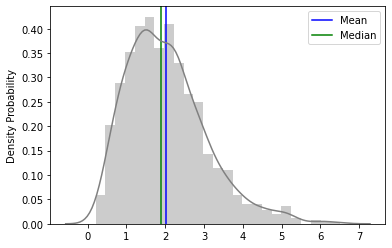

In [34]:
dist_df = byCou
dist_df = np.random.gamma(4, 0.5,1000)
mean = dist_df.mean()
median = np.median(dist_df)
plt.ylabel("Density Probability")
plt.axvline(mean,color = 'blue',label = 'Mean')
plt.axvline(median,color = 'green',label = 'Median')

_ = sns.distplot(dist_df,color = "grey")
_ = plt.legend()


The mean is greater than the median, the distribution is positively skewed.

# 4.Calculate the minimum, maximum and interquartile range of the CO2 emissions for 1990. Using this information, and the mean and median, what does this tell you about the distribution of CO2 emissions?

# Minimum

In [35]:
byCou.min()

-2998.6

# Maximum

In [36]:
byCou.max()

4823599.85

# InterQuartile Range

In [37]:
q1 = byCou.quantile(0.25)
q1

85.7525

In [38]:

q2 = byCou.median()
q2

1236.955

In [39]:
q3 = byCou.quantile(0.75)
q3

21386.615

In [40]:
iqr = q3 - q1
iqr 

21300.862500000003

The distribution is skewed/ assymetrical distribution because on tail is more than the other.This data is  right-skewed because the right hand side has a longer tail than the left.If this was a normal distribution the mean and the median were gonna be equal,now that the mean is more than the median it means that this distribution is positively(right-skewed)

# 5. Create a histogram of the CO2 emissions for 1990. Is this what you expected from your answers in questions 3 and 4?

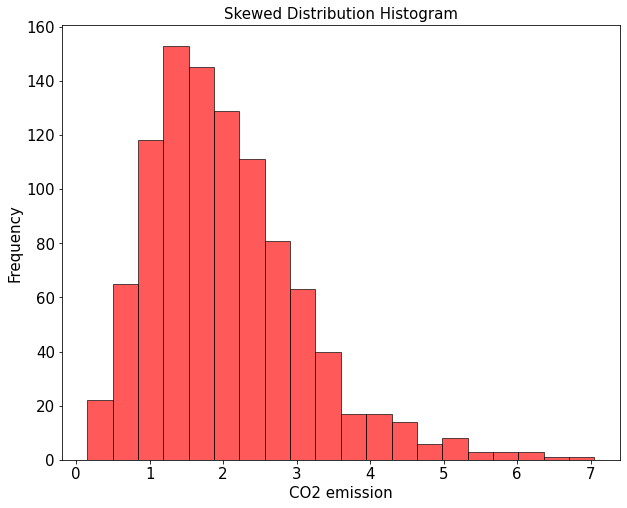

In [41]:
#Assigning new data frame
new_df = byCou

plt.figure(figsize = [10,8])
new_df = np.random.gamma(4, 0.5, 1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('CO2 emission', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Skewed Distribution Histogram',fontsize = 15)

plot = plt.hist(new_df, bins = 20, color='r',edgecolor = 'k', alpha = 0.65)

Yes this is what I expected my histogram to look like because this distribution is skewed and it is positively distributed(right-skewed) as the tail is on the right.

# 6.Calculate the standard deviation and standard error of the mean for CO2 emissions in 1990. How is the standard error different from the standard deviation?

# Standard deviation

In [42]:
byCou.std()

371365.112172181

# Standard error mean

In [43]:
byCou.sem()

24487.090346677225

Standard deviation measures dispersion for a subject set of data from mean while standard error measures how far the sample mean of data is likely to be from true population mean.

# 7.Create a line graph to show C02 emissions in Brazil, Russia, China, India, the USA and South Africa over time. What does the graph tell you about the difference and change in C02 emissions in these countries?

In [44]:
#Locating countries
BRZ =replacing["Country"][replacing["Country"] == "Brazil"]
CHN = replacing["Country"][replacing["Country"] == "China"]
IND = replacing["Country"][replacing["Country"] == "India"]
RSA = replacing["Country"][replacing["Country"] == "South Africa"]
RSF = replacing["Country"][replacing["Country"] == "Russian Federation"]
USA = replacing["Country"][replacing["Country"] == "United States"]

#Displaying posotions of the countries 

display(BRZ,CHN,IND,RSA,RSF,USA)


81    Brazil
82    Brazil
83    Brazil
Name: Country, dtype: object

123    China
124    China
125    China
Name: Country, dtype: object

276    India
277    India
278    India
Name: Country, dtype: object

561    South Africa
562    South Africa
563    South Africa
Name: Country, dtype: object

498    Russian Federation
499    Russian Federation
500    Russian Federation
Name: Country, dtype: object

651    United States
652    United States
653    United States
Name: Country, dtype: object

In [45]:
#Creating a new data frame

all_df = replacing.loc[(82,124,277,563,499,652),("Country","1990","1991","1992","1993","1994","1995",
                                        "1996","1997","1998","1999","2000","2001","2002",
                                        "2003","2004","2005","2006","2007","2008","2009","2010",
                                        "2011","2012","2013","2014","2015","2016","2017","2018","2019")]
 
all_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
82,Brazil,208887,219330.6,220705.7,230738.6,242154,258347.5,284782.9,300547.3,312289.1,...,419754.2,439412.9,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
124,China,2460744,2584538.3,2695982.1,2878694,3058241.3,3320285.2,3463089.1,3469510,3324344.5,...,8256969.2,9019518.2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
277,India,690576.8,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,...,1950950.3,2074344.9,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
563,South Africa,2.58,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,10.24,0.0,0.0,0.0,0.0,0.0
499,Russian Federation,0,0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,...,1742540.1,1808073,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
652,United States,4823557.1,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,...,5408869,5305569.6,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Grouping and changing data types using callable function lambda
byAll = all_df.groupby("Country")["1990","1991","1992","1993","1994","1995",
                                        "1996","1997","1998","1999","2000","2001","2002",
                                        "2003","2004","2005","2006","2007","2008","2009","2010",
                                        "2011","2012","2013","2014","2015","2016","2017",
                                        "2018","2019"].apply(lambda country : country.astype(float).sum()).reset_index()
byAll

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Brazil,208887.00,219330.6,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,312289.1,...,419754.2,439412.9,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,China,2460744.00,2584538.3,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,3324344.5,...,8256969.2,9019518.2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,India,690576.80,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,...,1950950.3,2074344.9,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,Russian Federation,0.00,0.0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,...,1742540.1,1808073.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,South Africa,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.24,0.0,0.0,0.0,0.0,0.0
5,United States,4823557.10,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,...,5408869.0,5305569.6,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [47]:
byAll.dtypes.value_counts()

float64    30
object      1
dtype: int64

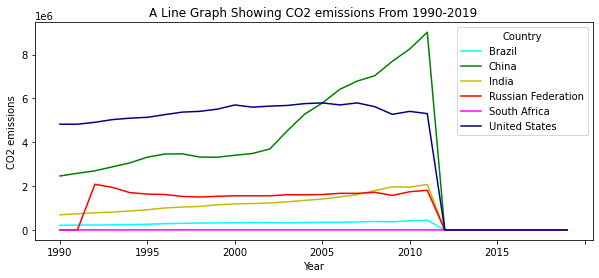

In [48]:
#Firstly I need to transpose my data set
allg = byAll.set_index("Country").T

#Plot setting
fig, ax = plt.subplots(figsize = (10,4))
ax.set_xlabel("Year")
ax.set_ylabel("CO2 emissions")
ax.set_title("A Line Graph Showing CO2 emissions From 1990-2019")

_ = allg.plot(ax = ax, color = ("cyan","g", "y","r", "fuchsia","darkblue"))
 

# 8.What is the mean and standard deviation for land area covered by forest in 1990? Why do you think the standard deviation is so large?

In [49]:
forest = replacing[((replacing.SeriesCode == 567))]
forest.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,1992,1993,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,E,0,0,0,...,2.1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,C,0,0,0,...,28.3,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
6,12,Algeria,567,Y,"Proportion of land area covered by forest, per...",0.7,C,0,0,0,...,0.6,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
9,16,American Samoa,567,Y,"Proportion of land area covered by forest, per...",90,C,0,0,0,...,90,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
12,20,Andorra,567,Y,"Proportion of land area covered by forest, per...",35.6,E,0,0,0,...,35.6,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [50]:
for_est = forest.loc[:, ('Country','1990') ]
for_est

,Country,1990
0,Afghanistan,2.1
3,Albania,28.8
6,Algeria,0.7
9,American Samoa,90
12,Andorra,35.6
...,...,...
675,Western Sahara,2.7
678,Yemen,1
681,Yugoslavia [former Socialist Federal Republic],0
684,Zambia,71


In [51]:
for_est.describe()

,Country,1990
count,230,230
unique,230,179
top,Comoros,0
freq,1,13


In [52]:
for_est.dtypes

Country    object
1990       object
dtype: object

In [53]:
#Changing 1990 from string to float and finding mean

for_est["1990"].astype(float).mean()

31.973478260869566

In [54]:
#Changing 1990 from string to float and finding standard deviation
for_est["1990"].astype(float).std()

25.73870110502395

A high standard deviation indicates that the data points are spread out over a large range of values.

# 9.Create histograms for land area covered by forest and percentage of area protected in 1990. Describe the distributions.

In [55]:
protected = replacing[((replacing.SeriesCode == 616))]
protected.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,1992,1993,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,C,0,0,0,...,0,0,0.0,0.0,0.46,0.0,0.0,0.0,0.0,0.0
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,C,0,0,0,...,0,0,0.0,0.0,1.91,0.0,0.0,0.0,0.0,0.0
8,12,Algeria,616,Y,Terrestrial and marine areas protected to tota...,5.97,C,0,0,0,...,0,0,0.0,0.0,7.46,0.0,0.0,0.0,0.0,0.0
11,16,American Samoa,616,Y,Terrestrial and marine areas protected to tota...,0.06,C,0,0,0,...,0,0,0.0,0.0,8.62,0.0,0.0,0.0,0.0,0.0
14,20,Andorra,616,Y,Terrestrial and marine areas protected to tota...,5.53,C,0,0,0,...,0,0,0.0,0.0,19.5,0.0,0.0,0.0,0.0,0.0


In [56]:
prot_df = protected.loc[:, ('Country','1990') ]
prot_df

,Country,1990
2,Afghanistan,0.36
5,Albania,0.15
8,Algeria,5.97
11,American Samoa,0.06
14,Andorra,5.53
...,...,...
677,Western Sahara,0
680,Yemen,0
683,Yugoslavia [former Socialist Federal Republic],0
686,Zambia,36.05


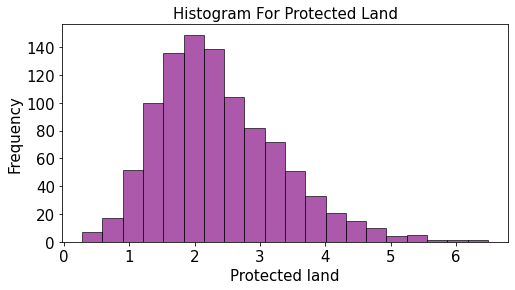

In [57]:
new_df = prot_df
#Defining the measures of central tendency
mean = new_df.mean()
median = new_df.median()

plt.figure(figsize = [8,4])
new_df = np.random.gamma(6, 0.4, 1000)
#new_df = np.random.gamma(1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('Protected land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Histogram For Protected Land',fontsize = 15)

plot = plt.hist(new_df.astype(float), bins = 20, color='purple',edgecolor = 'k', alpha = 0.65)

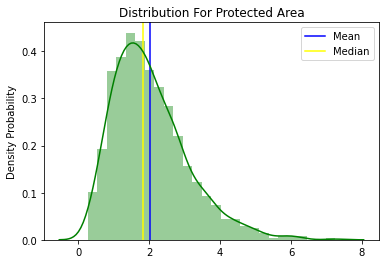

In [58]:
dist_df = prot_df
dist_df = np.random.gamma(4, 0.5,1000)
mean = dist_df.mean()
median = np.median(dist_df)

plt.axvline(mean,color = 'blue',label = 'Mean')
plt.axvline(median,color = 'yellow',label = 'Median')
plt.ylabel("Density Probability")
plt.title("Distribution For Protected Area")
_ = sns.distplot(dist_df,color = "green")
_ = plt.legend()

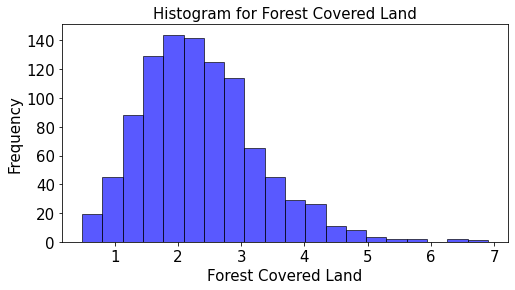

In [59]:
new_df = for_est
#Defining the measures of central tendency
mean = new_df.mean()
median = new_df.median()

plt.figure(figsize = [8,4])
new_df = np.random.gamma(6, 0.4, 1000)
#new_df = np.random.gamma(1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('Forest Covered Land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Histogram for Forest Covered Land',fontsize = 15)

plot = plt.hist(new_df.astype(float), bins = 20, color='blue',edgecolor = 'k', alpha = 0.65)

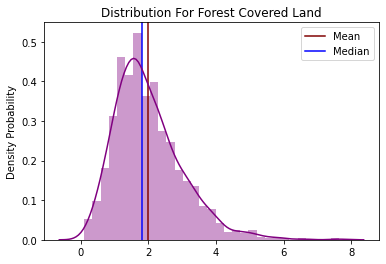

In [60]:
dist_df = for_est
dist_df = np.random.gamma(4, 0.5,1000)
mean = dist_df.mean()
median = np.median(dist_df)

plt.axvline(mean,color = 'maroon',label = 'Mean')
plt.axvline(median,color = 'blue',label = 'Median')
plt.ylabel("Density Probability")
plt.title("Distribution For Forest Covered Land")
_ = sns.distplot(dist_df,color = "purple")
_ = plt.legend()

Both graphs are positively skew dostributed meaning the mean value is more than the median value.

# 10.Create a scatterplot with a regression line using seaborn.regplot to show the relationship between the proportion of land area covered by forest and the percentage of area protected in 2000.
What is the relationship between these two variables?
Describe any patterns in the scatterplot.
Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?).

In [61]:
#Creating a data frame for forest land and resetting the index while droping the old index

for_df = forest.loc[:, ("Country","2000") ].reset_index(drop = True)
for_df.drop("Country", axis =1)

,2000
0,2.1
1,28.1
2,0.7
3,90
4,35.6
...,...
225,2.7
226,1
227,0
228,68.8


In [62]:
#Creating dataframe for protected land

df_prot = protected.loc[:, ("Country","2000") ].reset_index(drop = True)
df_prot.drop("Country", axis =1)

,2000
0,0.36
1,0.48
2,5.98
3,0.06
4,9.25
...,...
225,0
226,0.36
227,0
228,36.06


In [63]:
result = pd.concat([for_df, df_prot["2000"]], axis = 1).fillna(0)
result

,Country,2000,2000
0,Afghanistan,2.1,0.36
1,Albania,28.1,0.48
2,Algeria,0.7,5.98
3,American Samoa,90,0.06
4,Andorra,35.6,9.25
...,...,...,...
225,Western Sahara,2.7,0
226,Yemen,1,0.36
227,Yugoslavia [former Socialist Federal Republic],0,0
228,Zambia,68.8,36.06


In [64]:
result.dtypes

Country    object
2000       object
2000       object
dtype: object

In [65]:
#Renaming columns

result.columns = ["Country", "forest", "protected"]
result

,Country,forest,protected
0,Afghanistan,2.1,0.36
1,Albania,28.1,0.48
2,Algeria,0.7,5.98
3,American Samoa,90,0.06
4,Andorra,35.6,9.25
...,...,...,...
225,Western Sahara,2.7,0
226,Yemen,1,0.36
227,Yugoslavia [former Socialist Federal Republic],0,0
228,Zambia,68.8,36.06


In [66]:
#result.drop(["Country"], axis = 1)

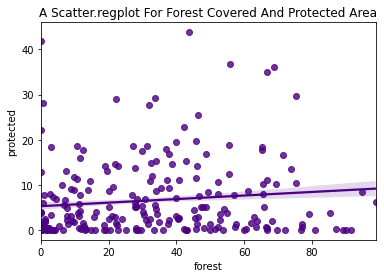

In [67]:
sns.regplot(data = result, x = result["forest"].astype(float), y = result["protected"].astype(float),ci = 68,color = "indigo")
_ = plt.title("A Scatter.regplot For Forest Covered And Protected Area"
             )

In [94]:
pearsoncorr = result.corr(method='pearson')
pearsoncorr

,log_prot,log_for
log_prot,1.000000,0.104388
log_for,0.104388,1.000000


This is a weak positive relationship because the r value is 0.10438 and it is closer to zero .Yes,I notice unusual values and they are called outliers.Outliers are observations with larger residuals.Outliers are the points that don't appear to fit, assuming that all the other points are valid.They can either indicate measurement error or heavily tailed distribution.

# There are three types of outliers namely:

 # 1.Global Outliers
 It's the values that are far outside the entire dataset.
 
 # 2.Contextual Outliers 
 These significantly deviates from the rest of the data points in the same context.
 
 # 3.Collective Outliers
 This is when a collection of related data instances is anomalous/inconsistent with respect to the entire dataset.

# 11.Since neither forested land area nor protected area is normally distributed, we will need to log transform these variables in order to calculate a correlation coefficient. Log transform the variables and show the transformed distributions in a histogram.

In [69]:
result_log = result
result_log['log_prot'] = np.log10(result['protected'].astype(float))
result_log['log_for'] = np.log10(result['forest'].astype(float))
result_log

,Country,forest,protected,log_prot,log_for
0,Afghanistan,2.1,0.36,-0.443697,0.322219
1,Albania,28.1,0.48,-0.318759,1.448706
2,Algeria,0.7,5.98,0.776701,-0.154902
3,American Samoa,90,0.06,-1.221849,1.954243
4,Andorra,35.6,9.25,0.966142,1.551450
...,...,...,...,...,...
225,Western Sahara,2.7,0,-inf,0.431364
226,Yemen,1,0.36,-0.443697,0.000000
227,Yugoslavia [former Socialist Federal Republic],0,0,-inf,-inf
228,Zambia,68.8,36.06,1.557026,1.837588


In [70]:
result.dtypes


Country       object
forest        object
protected     object
log_prot     float64
log_for      float64
dtype: object

In [71]:
result_log1 = result_log.drop(["forest","protected"], axis = 1)
result_log1

,Country,log_prot,log_for
0,Afghanistan,-0.443697,0.322219
1,Albania,-0.318759,1.448706
2,Algeria,0.776701,-0.154902
3,American Samoa,-1.221849,1.954243
4,Andorra,0.966142,1.551450
...,...,...,...
225,Western Sahara,-inf,0.431364
226,Yemen,-0.443697,0.000000
227,Yugoslavia [former Socialist Federal Republic],-inf,-inf
228,Zambia,1.557026,1.837588


In [72]:
# Removing infinite

result_log2 = result_log1[~result_log1.isin([np.nan, np.inf, -np.inf]).any(1)]
result_log2

,Country,log_prot,log_for
0,Afghanistan,-0.443697,0.322219
1,Albania,-0.318759,1.448706
2,Algeria,0.776701,-0.154902
3,American Samoa,-1.221849,1.954243
4,Andorra,0.966142,1.551450
...,...,...,...
222,Venezuela,1.564311,1.745855
223,Viet Nam,0.326336,1.577492
226,Yemen,-0.443697,0.000000
228,Zambia,1.557026,1.837588


In [73]:
result_log2.dtypes

Country      object
log_prot    float64
log_for     float64
dtype: object

In [74]:
result_log3 = result_log2.drop(["Country"], axis = 1)
result_log3

,log_prot,log_for
0,-0.443697,0.322219
1,-0.318759,1.448706
2,0.776701,-0.154902
3,-1.221849,1.954243
4,0.966142,1.551450
...,...,...
222,1.564311,1.745855
223,0.326336,1.577492
226,-0.443697,0.000000
228,1.557026,1.837588


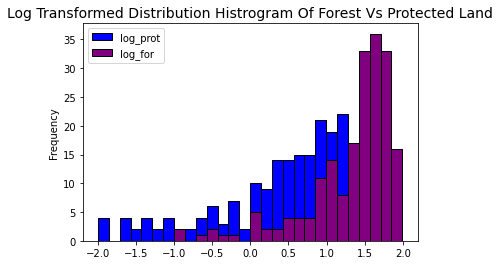

In [75]:

_= result_log3.plot( kind = "hist", bins = 28,edgecolor = 'k',color = ("blue", "purple"))
_ = plt.title("Log Transformed Distribution Histrogram Of Forest Vs Protected Land", fontsize = 14)

In [76]:
pearsoncorr = result_log3.corr(method='pearson')
pearsoncorr

,log_prot,log_for
log_prot,1.000000,0.104388
log_for,0.104388,1.000000


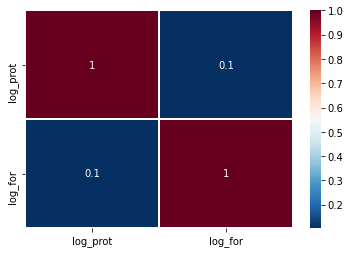

In [77]:
ax = sns.heatmap(pearsoncorr, cmap = 'RdBu_r',annot = True,linewidth = 0.5)

The coefficient of correlation is more than zero but less than one,this means that there is a weak positive relationship between the values.This means that while both variables tend to go up in response to one another, the relationship is not very strong.

# 12.Using the pearsonr function from the scipy.stats module, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between proportion of land area covered by forest and the percentage of area protected (as measured in 1990 and log transformed). See help(pearsonr) for help on this function.

In [78]:
#Creating a data frame for forest land and resetting the index while droping the old index

for1_df = forest.loc[:, ("Country","1990") ].reset_index(drop = True)
for1_df

,Country,1990
0,Afghanistan,2.1
1,Albania,28.8
2,Algeria,0.7
3,American Samoa,90
4,Andorra,35.6
...,...,...
225,Western Sahara,2.7
226,Yemen,1
227,Yugoslavia [former Socialist Federal Republic],0
228,Zambia,71


In [79]:
df_prot1 = protected.loc[:, ("Country","1990") ].reset_index(drop = True)
df_prot1

,Country,1990
0,Afghanistan,0.36
1,Albania,0.15
2,Algeria,5.97
3,American Samoa,0.06
4,Andorra,5.53
...,...,...
225,Western Sahara,0
226,Yemen,0
227,Yugoslavia [former Socialist Federal Republic],0
228,Zambia,36.05


In [80]:
for_prot= pd.concat([for1_df, df_prot1["1990"]], axis = 1).fillna(0)
for_prot

,Country,1990,1990
0,Afghanistan,2.1,0.36
1,Albania,28.8,0.15
2,Algeria,0.7,5.97
3,American Samoa,90,0.06
4,Andorra,35.6,5.53
...,...,...,...
225,Western Sahara,2.7,0
226,Yemen,1,0
227,Yugoslavia [former Socialist Federal Republic],0,0
228,Zambia,71,36.05


In [81]:
for_prot.columns = ["Country", "f1990", "p1990"]
for_prot

,Country,f1990,p1990
0,Afghanistan,2.1,0.36
1,Albania,28.8,0.15
2,Algeria,0.7,5.97
3,American Samoa,90,0.06
4,Andorra,35.6,5.53
...,...,...,...
225,Western Sahara,2.7,0
226,Yemen,1,0
227,Yugoslavia [former Socialist Federal Republic],0,0
228,Zambia,71,36.05


In [82]:
for_prot.drop(["Country"], axis = 1)

,f1990,p1990
0,2.1,0.36
1,28.8,0.15
2,0.7,5.97
3,90,0.06
4,35.6,5.53
...,...,...
225,2.7,0
226,1,0
227,0,0
228,71,36.05


In [83]:
for_prot.corr()

""


In [84]:
for_prot_log = for_prot
for_prot_log['log_f1990'] = np.log10(for_prot['f1990'].astype(float))
for_prot_log['log_p1990'] = np.log10(for_prot['p1990'].astype(float))
#for_prot_log

In [85]:
for_prot_log1 = for_prot_log.drop(["f1990","p1990"], axis = 1)
#for_prot_log1

In [86]:
for_prot_log2 = for_prot_log1[~for_prot_log1.isin([np.nan, np.inf, -np.inf]).any(1)]
for_prot_log2

,Country,log_f1990,log_p1990
0,Afghanistan,0.322219,-0.443697
1,Albania,1.459392,-0.823909
2,Algeria,-0.154902,0.775974
3,American Samoa,1.954243,-1.221849
4,Andorra,1.551450,0.742725
...,...,...,...
221,Vanuatu,1.557507,-1.096910
222,Venezuela,1.770852,1.429752
223,Viet Nam,1.480007,0.198657
228,Zambia,1.851258,1.556905


In [87]:
for_prot_log3 = for_prot_log2.drop(["Country"], axis = 1)
for_prot_log3

,log_f1990,log_p1990
0,0.322219,-0.443697
1,1.459392,-0.823909
2,-0.154902,0.775974
3,1.954243,-1.221849
4,1.551450,0.742725
...,...,...
221,1.557507,-1.096910
222,1.770852,1.429752
223,1.480007,0.198657
228,1.851258,1.556905


In [88]:
for_prot_log3.corr()

,log_f1990,log_p1990
log_f1990,1.000000,0.124373
log_p1990,0.124373,1.000000


In [89]:
#from scipy.stats.stats import pearsonr
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

In [90]:
from scipy.stats import linregress
linregress(for_prot_log3)

LinregressResult(slope=0.17698226128740788, intercept=0.06269038311975494, rvalue=0.1243725477611037, pvalue=0.09254717032188725, stderr=0.1046608641024259)

The Pearson correlation coefficient(rvalue) = 0.1243,the Pearson correlation coefficient(pvalue) = 0.09254.This means that there is a positive week linear relationship between the variables.The slope = 0.1769 this means that the direction is going up to the right,meaning it is a weak increase relationship.This is not statistically significant.Thed p-value is compared to the significance level(alpha) which is usually 0.05 and works well.In this case the p-value is greater than 0.05 which means that I cannot conclude that the correlation is different from zero.